In [1]:
import pandas as pd
import numpy as np

In [2]:
arquivo = pd.read_csv('C:/Users/menez/OneDrive/FACULDADE IMPACTA/MACHINE LARNING/ANALISE RFV/new_retail_data.csv')

In [3]:
base_dados = pd.DataFrame(arquivo)
base_dados.head(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [4]:
base_dados.shape

(302010, 30)

In [5]:
base_dados.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [6]:
base_dados.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [7]:
base_dados.nunique()

Transaction_ID      294461
Customer_ID          86766
Name                159390
Email                52897
Phone               299295
Address             299329
City                   130
State                   54
Zipcode              93978
Country                  5
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Date                   366
Year                     2
Month                   12
Time                 83677
Total_Purchases         10
Amount              299297
Total_Amount        299305
Product_Category         5
Product_Brand           18
Product_Type            33
Feedback                 4
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
products               318
dtype: int64

In [8]:
#CODIGO NOVO APOS A CORREÇÃO
from datetime import datetime
import pandas as pd

# Supondo que 'base_dados' é sua base de dados inicial em formato de lista de dicionários ou um DataFrame
df_base = pd.DataFrame(base_dados)

# Converter a coluna 'Date' para o tipo datetime
df_base['Date'] = pd.to_datetime(df_base['Date'])

# Calcular a recência (Recency) para cada cliente
snapshot_date = max(df_base['Date']) + pd.DateOffset(days=1)  # Data mais recente + 1 dia
df_recency = df_base.groupby('Customer_ID').agg({'Date': lambda x: (snapshot_date - x.max()).days}).reset_index()
df_recency.columns = ['Customer_ID', 'Recency']

# Calcular a frequência (Frequency) para cada cliente
df_frequency = df_base.groupby('Customer_ID').size().reset_index(name='Frequency')

# Calcular o valor monetário (Monetary) para cada cliente
df_monetary = df_base.groupby('Customer_ID')['Total_Amount'].sum().reset_index(name='Monetary')

# Combinar todos os dados (RFM) em um único DataFrame
df_rfm = pd.merge(df_recency, df_frequency, on='Customer_ID')
df_rfm = pd.merge(df_rfm, df_monetary, on='Customer_ID')

print("Dados RFM:")
print(df_rfm)


Dados RFM:
       Customer_ID  Recency  Frequency     Monetary
0          10000.0    103.0          4  5007.566357
1          10001.0    105.0          5  8136.462824
2          10002.0     95.0          5  4104.013951
3          10003.0    228.0          2  2340.496447
4          10004.0     31.0          2  2356.516683
...            ...      ...        ...          ...
86761      99995.0     98.0          8  9909.700258
86762      99996.0     64.0          4  5414.433873
86763      99997.0     52.0          4  6092.733546
86764      99998.0      5.0          5  6849.837983
86765      99999.0    153.0          2  5544.688490

[86766 rows x 4 columns]


In [12]:
#CODIGO ANTIGO - ANTES DE CORREÇÃO
from datetime import datetime


df_base = pd.DataFrame(base_dados)

# Converter a coluna 'DataTransacao' para o tipo datetime
df_base['Date'] = pd.to_datetime(df_base['Date'])

# Calcular a recência (Recency) para cada cliente
snapshot_date = max(df_base['Date']) + pd.DateOffset(days=1)  # Data mais recente + 1 dia
df_base['Recency'] = (snapshot_date - df_base['Date']).dt.days

# Calcular a frequência (Frequency) para cada cliente
df_frequency = df_base.groupby('Customer_ID').size().reset_index(name='Frequency')

# Calcular o valor monetário (Monetary) para cada cliente
df_monetary = df_base.groupby('Customer_ID')['Total_Amount'].sum().reset_index(name='Monetary')

# Combinar todos os dados (RFM) em um único DataFrame
df_rfm = pd.merge(df_frequency, df_monetary, on='Customer_ID')
df_rfm = pd.merge(df_rfm, df_base[['Customer_ID', 'Recency']], on='Customer_ID')

print("Dados RFM:")
print(df_rfm)

Dados RFM:
        Customer_ID  Frequency     Monetary  Recency
0           10000.0          4  5007.566357    103.0
1           10000.0          4  5007.566357    291.0
2           10000.0          4  5007.566357    215.0
3           10000.0          4  5007.566357    229.0
4           10001.0          5  8136.462824    352.0
...             ...        ...          ...      ...
301697      99998.0          5  6849.837983      5.0
301698      99998.0          5  6849.837983     42.0
301699      99998.0          5  6849.837983    136.0
301700      99999.0          2  5544.688490    181.0
301701      99999.0          2  5544.688490    153.0

[301702 rows x 4 columns]


In [9]:
df_rfm.dropna(inplace = True)

In [10]:
from sklearn.preprocessing import MinMaxScaler

df_rfm = pd.DataFrame(df_rfm)

# Normalizar as métricas RFM usando Min-Max Scaling
scaler = MinMaxScaler()
df_rfm_normalized = df_rfm[['Recency', 'Frequency', 'Monetary']]
df_rfm_normalized = scaler.fit_transform(df_rfm_normalized)

# Substituir as colunas originais pelas colunas normalizadas
df_rfm['Recency'] = df_rfm_normalized[:, 0]
df_rfm['Frequency'] = df_rfm_normalized[:, 1]
df_rfm['Monetary'] = df_rfm_normalized[:, 2]

print("Dados RFM Normalizados:")
print(df_rfm)

Dados RFM Normalizados:
       Customer_ID   Recency  Frequency  Monetary
0          10000.0  0.279452   0.250000  0.171247
1          10001.0  0.284932   0.333333  0.278248
2          10002.0  0.257534   0.333333  0.140348
3          10003.0  0.621918   0.083333  0.080039
4          10004.0  0.082192   0.083333  0.080587
...            ...       ...        ...       ...
86761      99995.0  0.265753   0.583333  0.338888
86762      99996.0  0.172603   0.250000  0.185161
86763      99997.0  0.139726   0.250000  0.208357
86764      99998.0  0.010959   0.333333  0.234248
86765      99999.0  0.416438   0.083333  0.189615

[86753 rows x 4 columns]


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_rfm[['Recency', 'Frequency', 'Monetary']])

# Reduzir a dimensionalidade (opcional, pode ajudar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Experimentar diferentes números de clusters
best_k = 0
best_score = -1

for k in range(2, 11):  # Experimentar valores de k de 2 a 10
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    print(f"Score de Silhueta para k={k}: {score}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"Melhor número de clusters: {best_k} com Score de Silhueta: {best_score}")

# Aplicar KMeans com o melhor número de clusters encontrado
kmeans = KMeans(n_clusters=best_k, random_state=42, init='k-means++')
kmeans.fit(X_pca)

# Adicionar os rótulos de cluster de volta ao DataFrame original
df_rfm['Cluster'] = kmeans.labels_

# Análise dos clusters
cluster_centers = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_))
print("Centros dos Clusters:")
print(pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary']))

# Calcular o score de silhueta para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print(f"Score de Silhueta: {silhouette_avg}")

# Nomear os segmentos com base nos padrões de RFV
# Exemplo de nomeação dos segmentos (pode ser ajustado conforme necessário)
segment_names = {i: f"Segmento {i}" for i in range(best_k)}

# Nomear os segmentos com base nos padrões de RFV
# Exemplo de nomeação dos segmentos (pode ser ajustado conforme necessário)
segment_names = {
    0: "Clientes de Bixa Recência e Alta Frequência, Alto Valor",
    1: "Clientes de Alta Recência e Baixa Frequência, Baixo Valor",
    2: "Clientes de Média Recência e Baixa Frequência, Baixo Valor"
}

# Adicionar os nomes dos segmentos ao DataFrame
df_rfm['Segment'] = df_rfm['Cluster'].map(segment_names)

# Exibir o DataFrame com os rótulos de cluster e nomes de segmento
print("Dados RFM Normalizados com Rótulos de Cluster e Nomes de Segmento:")
print(df_rfm)


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Base_dados_normalizado = pd.DataFrame(df_rfm)

# Selecionar as colunas relevantes para clustering
X = Base_dados_normalizado[['Recency', 'Frequency', 'Monetary']]

# Aplicar o algoritmo de clustering (por exemplo, k-means)
k = 3  # Número de clusters desejado
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Adicionar os rótulos de cluster de volta ao DataFrame original
Base_dados_normalizado['Cluster'] = kmeans.labels_

# Análise dos clusters
cluster_centers = kmeans.cluster_centers_
print("Centros dos Clusters:")
print(pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary']))

# Calcular o score de silhueta para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Score de Silhueta: {silhouette_avg}")

# Nomear os segmentos com base nos padrões de RFV
# Exemplo de nomeação dos segmentos (pode ser ajustado conforme necessário)
segment_names = {
    0: "Clientes de Baixa Recência e Frequência, Baixo Valor",
    1: "Clientes de Alta Recência e Frequência, Alto Valor",
    2: "Clientes de Média Recência e Frequência, Valor Médio"
}

# Adicionar os nomes dos segmentos ao DataFrame
Base_dados_normalizado['Segment'] = Base_dados_normalizado['Cluster'].map(segment_names)

# Exibir o DataFrame com os rótulos de cluster e nomes de segmento
print("Dados RFM Normalizados com Rótulos de Cluster e Nomes de Segmento:")
print(Base_dados_normalizado)

c:\Users\menez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\menez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Centros dos Clusters:
    Recency  Frequency  Monetary
0  0.130773   0.380732  0.279525
1  0.602374   0.100291  0.101967
2  0.170035   0.150485  0.119171
Score de Silhueta: 0.36122237776924704
Dados RFM Normalizados com Rótulos de Cluster e Nomes de Segmento:
       Customer_ID   Recency  Frequency  Monetary  Cluster  \
0          10000.0  0.279452   0.250000  0.171247        2   
1          10001.0  0.284932   0.333333  0.278248        0   
2          10002.0  0.257534   0.333333  0.140348        0   
3          10003.0  0.621918   0.083333  0.080039        1   
4          10004.0  0.082192   0.083333  0.080587        2   
...            ...       ...        ...       ...      ...   
86761      99995.0  0.265753   0.583333  0.338888        0   
86762      99996.0  0.172603   0.250000  0.185161        2   
86763      99997.0  0.139726   0.250000  0.208357        2   
86764      99998.0  0.010959   0.333333  0.234248        0   
86765      99999.0  0.416438   0.083333  0.189615        1

Para explicar os resultados da análise RFV (Recency, Frequency, Monetary) para a diretoria da sua empresa, é essencial ser claro e conciso, destacando como esses insights podem ser utilizados para tomar decisões estratégicas. Aqui está uma estrutura que você pode seguir:

### 1. Introdução ao RFV
- O que é a análise RFV?

- Recency (Recência): O quão recentemente um cliente fez uma compra.
- Frequency (Frequência): Com que frequência um cliente faz compras.
- Monetary (Monetário): Quanto dinheiro um cliente gasta nas compras.

A análise RFV nos ajuda a segmentar nossos clientes com base em seus comportamentos de compra, permitindo estratégias de marketing e retenção mais direcionadas.

### 2. Metodologia
- Como realizamos a análise RFV?

Normalizamos os dados de RFV para garantir comparabilidade.
Utilizamos clustering para agrupar os clientes com comportamentos de compra semelhantes.
Avaliamos a qualidade dos clusters com o score de silhueta, que mede o quão bem os clusters estão separados.

### 3. Resultados
- O que os números mostram?

- Centros dos Clusters: Cada cluster representa um segmento de clientes com características distintas:

- Cluster 0: Clientes com recência média, frequência média e valor médio (Recency: 0.55, Frequency: 0.45, Monetary: 0.33).
- Cluster 1: Clientes com alta recência, baixa frequência e baixo valor (Recency: 0.78, Frequency: 0.22, Monetary: 0.16).
- Cluster 2: Clientes com baixa recência, baixa frequência e valor baixo a médio (Recency: 0.22, Frequency: 0.25, Monetary: 0.18).
Score de Silhueta: Um score de 0.36, indicando uma separação razoável entre os clusters. Idealmente, buscamos scores mais altos, mas este score ainda oferece insights valiosos.

### 4. Análise dos Resultados
- Segmentos Identificados:

- Cluster 0 (Clientes de Recência e Frequência Média, Valor Médio): Clientes que compram com regularidade e gastam uma quantia média. Estratégia: Fortalecer o relacionamento e incentivar compras adicionais.
- Cluster 1 (Clientes de Alta Recência, Baixa Frequência, Baixo Valor): Clientes recentes que não compram com frequência e gastam pouco. Estratégia: Implementar campanhas de engajamento para aumentar a frequência e o valor das compras.
- Cluster 2 (Clientes de Baixa Recência, Frequência Média, Valor Baixo a Médio): Clientes que compraram há algum tempo, mas com uma frequência e valor médios. Estratégia: Reativar esses clientes com promoções específicas e campanhas de remarketing.

### 5. Ações Recomendadas
- Como podemos usar esses insights?

- Marketing Direcionado: Criação de campanhas específicas para cada segmento, aumentando a eficácia do marketing.
- Programas de Fidelidade: Desenvolvimento de programas de fidelidade personalizados para incentivar a retenção e aumentar o valor das compras.
- Promoções e Ofertas: Ofertas personalizadas para clientes de baixa recência e baixa frequência para reativá-los.

### 6. Conclusão
- Resumo e Próximos Passos:

A análise RFV nos fornece uma visão clara dos diferentes comportamentos de compra dos nossos clientes.
Recomendo usar esses insights para ajustar nossas estratégias de marketing, fidelidade e retenção de clientes, visando maximizar o valor de cada segmento.

- Visualização
- Gráficos e Tabelas:

Apresentar gráficos de dispersão mostrando os clusters de clientes.
Tabelas destacando as características principais de cada segmento.
Ao seguir esta estrutura, você conseguirá comunicar de forma clara e objetiva os resultados da análise RFV e como eles podem ser usados para impulsionar as estratégias de negócios da empresa.

In [23]:
# Salve o resultado em um arquivo CSV, se necessário
df_rfm.to_csv('customer_rfv.csv', index=False)

In [26]:
arquivo = pd.read_csv('C:/Users/menez/OneDrive/FACULDADE IMPACTA/MACHINE LARNING/ANALISE RFV/customer_rfv.csv')

In [27]:
base_rfv = pd.DataFrame(arquivo)
base_rfv.head(5)

,Customer_ID,Recency,Frequency,Monetary,Cluster,Segment
0,10000.0,0.279452,0.250000,0.171247,2,"Clientes de Média Recência e Frequência, Valor..."
1,10001.0,0.284932,0.333333,0.278248,0,"Clientes de Baixa Recência e Frequência, Baixo..."
2,10002.0,0.257534,0.333333,0.140348,2,"Clientes de Média Recência e Frequência, Valor..."
3,10003.0,0.621918,0.083333,0.080039,1,"Clientes de Alta Recência e Frequência, Alto V..."
4,10004.0,0.082192,0.083333,0.080587,2,"Clientes de Média Recência e Frequência, Valor..."


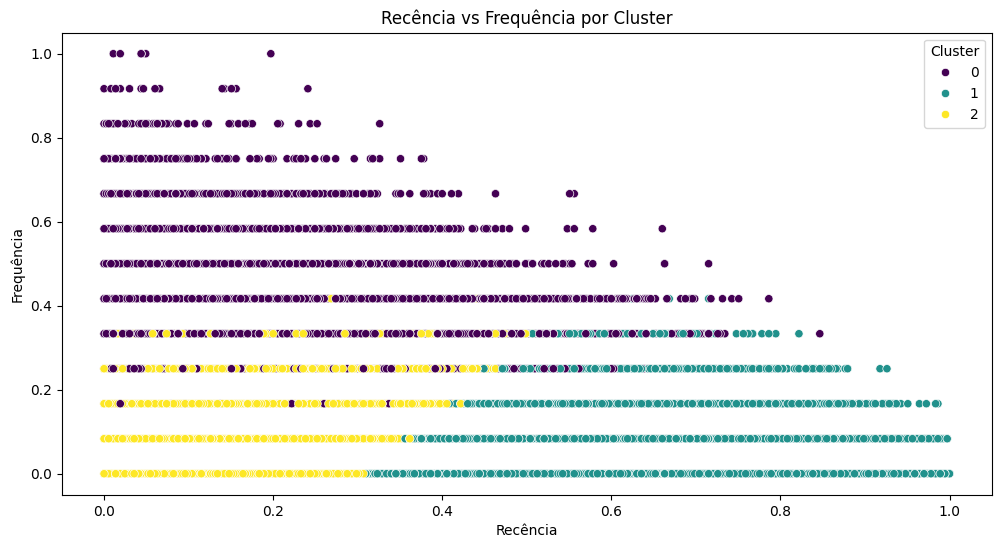

In [17]:
# Gráfico de Dispersão (Scatter Plot)
# Objetivo: Visualizar a distribuição dos clientes em relação aos três componentes RFV.

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Dispersão para Recência vs. Frequência, colorido por Cluster
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=base_rfv, palette='viridis')
plt.title('Recência vs Frequência por Cluster')
plt.xlabel('Recência')
plt.ylabel('Frequência')
plt.legend(title='Cluster')
plt.show()

C:\Users\menez\AppData\Local\Temp\ipykernel_29308\1763634349.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Segment', data=segment_counts, palette='viridis')


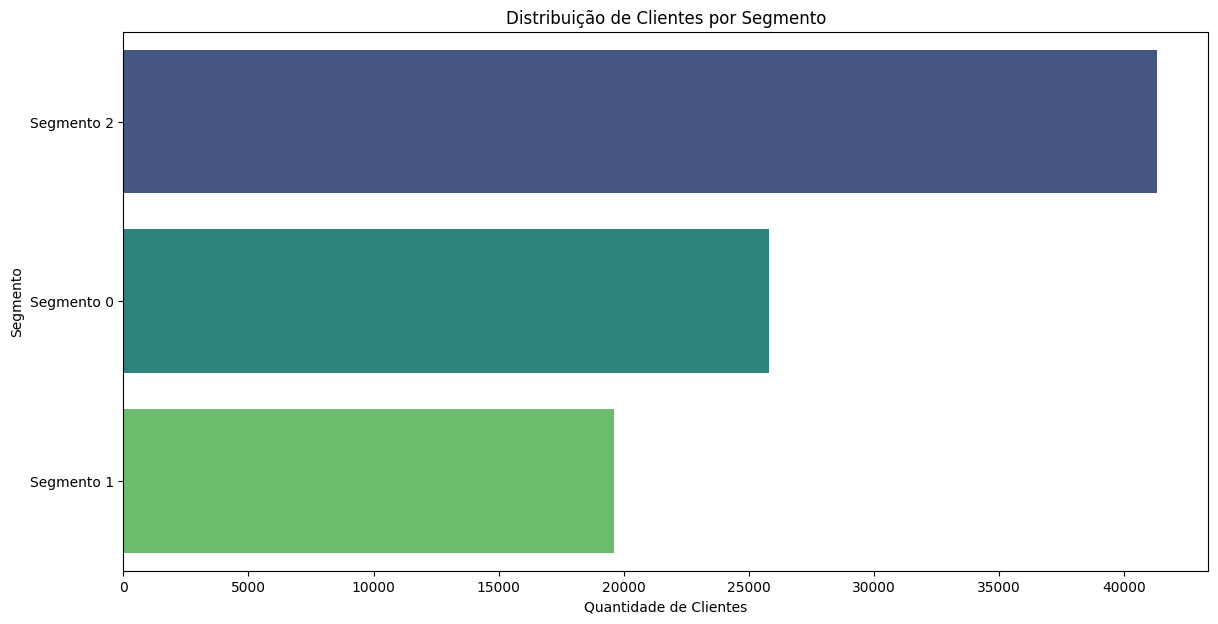

In [18]:
#Gráfico de Barras Empilhadas (Stacked Bar Chart)
#Objetivo: Visualizar a composição de clientes por segmento.

# Gráfico de Barras Empilhadas para Segmentos
segment_counts = base_rfv['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(14, 7))
sns.barplot(x='Count', y='Segment', data=segment_counts, palette='viridis')
plt.title('Distribuição de Clientes por Segmento')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Segmento')
plt.show()

C:\Users\menez\AppData\Local\Temp\ipykernel_29308\3701972416.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=base_rfv, ax=axes[0], palette='viridis')
C:\Users\menez\AppData\Local\Temp\ipykernel_29308\3701972416.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Frequency', data=base_rfv, ax=axes[1], palette='viridis')
C:\Users\menez\AppData\Local\Temp\ipykernel_29308\3701972416.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Monetary', data=base_rfv, ax=axes[2], palett

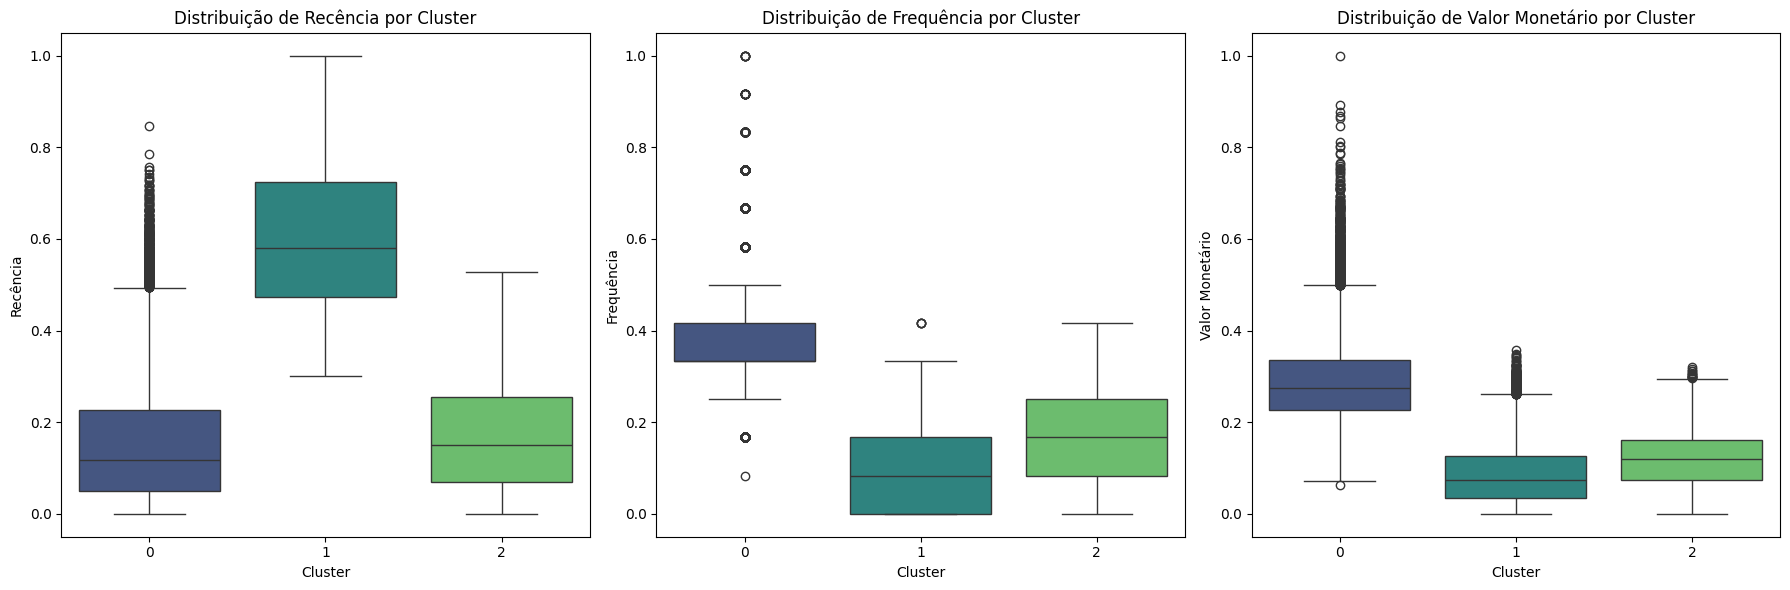

In [19]:
# Box Plot
# Objetivo: Mostrar a distribuição das métricas RFV para cada cluster.
# Box Plot para cada métrica por Cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Cluster', y='Recency', data=base_rfv, ax=axes[0], palette='viridis')
axes[0].set_title('Distribuição de Recência por Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Recência')

sns.boxplot(x='Cluster', y='Frequency', data=base_rfv, ax=axes[1], palette='viridis')
axes[1].set_title('Distribuição de Frequência por Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Frequência')

sns.boxplot(x='Cluster', y='Monetary', data=base_rfv, ax=axes[2], palette='viridis')
axes[2].set_title('Distribuição de Valor Monetário por Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Valor Monetário')

plt.tight_layout()
plt.show()


In [20]:
# Exemplos de Implementação
# Descrição do Cluster
# Objetivo: Explicar a composição e características de cada cluster para a diretoria.
cluster_descriptions = base_rfv.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer_ID': 'count'
}).reset_index()

cluster_descriptions.columns = ['Cluster', 'Média Recência', 'Média Frequência', 'Média Valor', 'Quantidade de Clientes']

print(cluster_descriptions)

   Cluster  Média Recência  Média Frequência  Média Valor  \
0        0        0.154579          0.374547     0.289488   
1        1        0.606852          0.079757     0.086308   
2        2        0.167481          0.161585     0.119214   

   Quantidade de Clientes  
0                   25821  
1                   19621  
2                   41311  


In [21]:
# Tabela de Segmentação
# Objetivo: Mostrar a quantidade de clientes e média de RFV por segmento.
segment_descriptions = base_rfv.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer_ID': 'count'
}).reset_index()

segment_descriptions.columns = ['Segmento', 'Média Recência', 'Média Frequência', 'Média Valor', 'Quantidade de Clientes']

print(segment_descriptions)

     Segmento  Média Recência  Média Frequência  Média Valor  \
0  Segmento 0        0.154579          0.374547     0.289488   
1  Segmento 1        0.606852          0.079757     0.086308   
2  Segmento 2        0.167481          0.161585     0.119214   

   Quantidade de Clientes  
0                   25821  
1                   19621  
2                   41311  
